# Weekly TSMOM vs Contrarian Strategy Analysis

**Clean, vectorized TSMOM and Contrarian strategies on Forex data with weekly rebalancing and proper bias prevention.**

## Strategy Logic
- **Weekly Rebalancing**: Consistent 1-week holding period with Friday rebalancing
- **TSMOM Signals**: Long if past N-week return > 0, Short if < 0 (momentum)
- **Contrarian Signals**: Long if past N-week return < 0, Short if > 0 (contrarian) 
- **Equal Weight**: Across all active positions with weekly rebalancing
- **Strict Lookahead Prevention**: `.shift(1)` on all signals
- **Lookback Periods**: 1W, 2W, 4W, 8W for both strategies

## Key Features
- ✅ **Dual Strategy Testing**: Direct momentum vs contrarian comparison
- ✅ **Weekly Granularity**: Higher frequency rebalancing (52x/year vs 12x/year)
- ✅ **Temporal Consistency**: Weekly-only for coherent rebalancing
- ✅ **Proper Date Formatting**: Fixed x-axis issues
- ✅ **Series Format**: Fixed drawdown calculation errors
- ✅ **No Transaction Costs**: Pure strategy performance

In [1]:
# Simple imports
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../modules')

from data_loader import SimpleForexLoader
from tsmom_strategy import WeeklyTSMOM, WeeklyContrarian
from backtest_engine import WeeklyBacktestEngine
from performance_utils import SimplePerformanceAnalyzer

import warnings
warnings.filterwarnings('ignore')

print("✅ All modules imported successfully!")

✅ All modules imported successfully!


In [2]:
# ============= COMPLETE WEEKLY TSMOM vs CONTRARIAN ANALYSIS =============

# 1. Load forex data - focus on weekly frequency
loader = SimpleForexLoader()
daily, weekly, monthly = loader.load_all_data()

# 2. Generate TSMOM signals for weekly rebalancing (1W, 2W, 4W, 8W lookbacks)
tsmom = WeeklyTSMOM(lookbacks_weekly=[1, 2, 4, 8])
tsmom_signals = tsmom.generate_all_signals(weekly)

# 3. Generate Contrarian signals for weekly rebalancing (same lookbacks)
contrarian = WeeklyContrarian(lookbacks_weekly=[1, 2, 4, 8])
contrarian_signals = contrarian.generate_all_signals(weekly)

# 4. Combine all signals for unified backtesting
all_signals = {**tsmom_signals, **contrarian_signals}

# 5. Run backtests with weekly rebalancing (no transaction costs)
backtest = WeeklyBacktestEngine()
results = backtest.run_backtest(all_signals, weekly)

# 6. Calculate performance metrics and create analyzer
metrics = backtest.calculate_metrics(results)
analyzer = SimplePerformanceAnalyzer()

print("\n🎯 Weekly TSMOM vs Contrarian analysis finished!")
print(f"📊 TSMOM strategies: {list(tsmom_signals.keys())}")
print(f"📊 Contrarian strategies: {list(contrarian_signals.keys())}")
print(f"📅 Holding period: 1 week with weekly rebalancing (Friday)")
print(f"🔄 Rebalancing frequency: 52x per year vs 12x monthly")

# ============= ANALISI DISPONIBILITÀ DATI FOREX =============
print("\n" + "="*60)
print("📊 ANALISI DISPONIBILITÀ DATI FOREX SETTIMANALI")
print("="*60)

print(f"Dati settimanali: {weekly.shape[0]} settimane, {weekly.shape[1]} coppie")
print(f"Periodo: {weekly.index[0].strftime('%Y-%m-%d')} → {weekly.index[-1].strftime('%Y-%m-%d')}")
print(f"Anni di dati: {len(weekly) / 52:.1f} anni")
print(f"Frequenza: {weekly.index.freq if hasattr(weekly.index, 'freq') else 'Weekly-Friday'}")

# Analizza la disponibilità temporale dei dati forex
availability_df = loader.analyze_data_availability()
print(f"\nTotale coppie valutarie: {len(availability_df)}")
print(f"Durata media dati: {availability_df['duration_years'].mean():.1f} anni")


🎯 Weekly TSMOM vs Contrarian analysis finished!
📊 TSMOM strategies: ['TSMOM_1W', 'TSMOM_2W', 'TSMOM_4W', 'TSMOM_8W']
📊 Contrarian strategies: ['CONTRARIAN_1W', 'CONTRARIAN_2W', 'CONTRARIAN_4W', 'CONTRARIAN_8W']
📅 Holding period: 1 week with weekly rebalancing (Friday)
🔄 Rebalancing frequency: 52x per year vs 12x monthly

📊 ANALISI DISPONIBILITÀ DATI FOREX SETTIMANALI
Dati settimanali: 1337 settimane, 34 coppie
Periodo: 2000-01-07 → 2025-08-15
Anni di dati: 25.7 anni
Frequenza: <Week: weekday=4>

Totale coppie valutarie: 34
Durata media dati: 22.2 anni


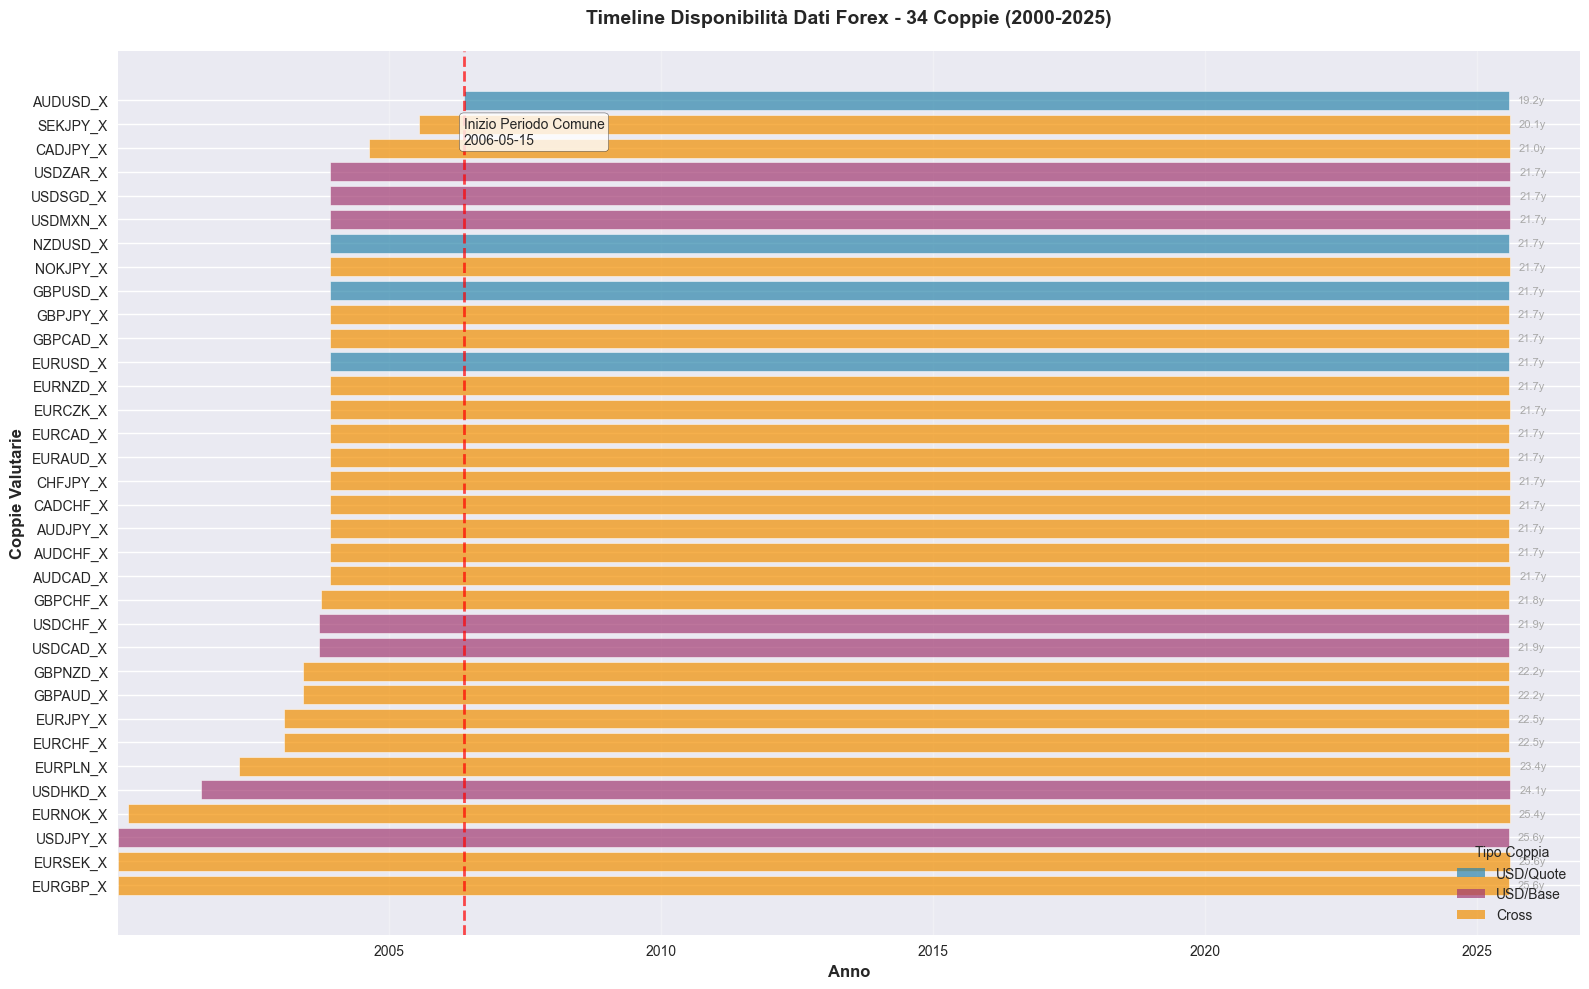


✅ Plot salvato come: ../results/forex_data_availability.png
📊 Dataset espanso: 34 coppie valutarie

📋 Esempi per categoria:
  USD/Quote: EURUSD_X, NZDUSD_X, GBPUSD_X
  USD/Base: USDJPY_X, USDHKD_X, USDCHF_X
  Cross: EURGBP_X, EURSEK_X, EURNOK_X

🌍 Copertura geografica:
  Valute totali coperte: 16
  Valute principali: AUD, CAD, CHF, CZK, EUR, GBP, HKD, JPY, MXN, NOK, NZD, PLN, SEK, SGD, USD, ZAR


In [3]:
# Crea plot timeline della disponibilità dei dati
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 10))

# Colori per tipo di coppia
colors = {
    'USD_Quote': '#2E86AB',  # Blu - coppie XXX/USD
    'USD_Base': '#A23B72',   # Viola - coppie USD/XXX  
    'Cross': '#F18F01'       # Arancione - cross pairs
}

# Ordina per data di inizio
availability_df_sorted = availability_df.sort_values(['start_date', 'pair'])

# Plot delle barre temporali
y_positions = range(len(availability_df_sorted))
for i, row in availability_df_sorted.iterrows():
    color = colors[row['pair_type']]
    
    # Barra orizzontale dalla data inizio alla data fine
    ax.barh(y_positions[list(availability_df_sorted.index).index(i)], 
            (row['end_date'] - row['start_date']).days,
            left=row['start_date'], 
            height=0.8,
            color=color, 
            alpha=0.7,
            edgecolor='white',
            linewidth=0.5)
    
    # Annotazione con durata
    duration_text = f"{row['duration_years']:.1f}y"
    ax.text(row['end_date'] + pd.Timedelta(days=60), 
            y_positions[list(availability_df_sorted.index).index(i)],
            duration_text, 
            va='center', 
            fontsize=8,
            color='darkgray')

# Configurazione assi
ax.set_yticks(y_positions)
ax.set_yticklabels(availability_df_sorted['pair'].values)
ax.set_xlabel('Anno', fontsize=12, fontweight='bold')
ax.set_ylabel('Coppie Valutarie', fontsize=12, fontweight='bold')
ax.set_title(f'Timeline Disponibilità Dati Forex - {len(availability_df)} Coppie (2000-2025)', 
             fontsize=14, fontweight='bold', pad=20)

# Formattazione date
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Ogni 5 anni
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Ogni anno
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='x', rotation=0)

# Griglia
ax.grid(True, alpha=0.3, axis='x')
ax.set_axisbelow(True)

# Legenda
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[t], alpha=0.7, label=t.replace('_', '/')) 
                  for t in colors.keys()]
ax.legend(handles=legend_elements, loc='lower right', title='Tipo Coppia')

# Linea verticale per periodo comune
common_start = availability_df['start_date'].max()
ax.axvline(x=common_start, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax.text(common_start, len(availability_df_sorted) * 0.95, 
        f'Inizio Periodo Comune\n{common_start.strftime("%Y-%m-%d")}', 
        rotation=0, ha='left', va='top', 
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('../results/forex_data_availability.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Plot salvato come: ../results/forex_data_availability.png")
print(f"📊 Dataset espanso: {len(availability_df)} coppie valutarie")

# Mostra alcune coppie di esempio per categoria
print(f"\n📋 Esempi per categoria:")
for pair_type in ['USD_Quote', 'USD_Base', 'Cross']:
    examples = availability_df[availability_df['pair_type'] == pair_type]['pair'].head(3).tolist()
    print(f"  {pair_type.replace('_', '/')}: {', '.join(examples)}")

print(f"\n🌍 Copertura geografica:")
currencies = set()
for pair in availability_df['pair']:
    # Estrai valute dal nome della coppia
    if 'USD' in pair:
        currencies.add('USD')
        other_curr = pair.replace('USD', '').replace('_X', '')
        if other_curr:
            currencies.add(other_curr[:3])  # Prendi i primi 3 caratteri
    else:
        # Cross pair - estrai entrambe le valute
        clean_pair = pair.replace('_X', '')
        if len(clean_pair) == 6:
            currencies.add(clean_pair[:3])
            currencies.add(clean_pair[3:6])

print(f"  Valute totali coperte: {len(currencies)}")
print(f"  Valute principali: {', '.join(sorted(currencies))}")

## Complete Weekly TSMOM vs Contrarian Analysis

In [4]:
# ============= WEEKLY DUAL STRATEGY ANALYSIS =============

# 1. Load forex data - focus on weekly frequency
loader = SimpleForexLoader()
daily, weekly, monthly = loader.load_all_data()

# 2. Generate TSMOM signals for weekly rebalancing (1W, 2W, 4W, 8W lookbacks)
tsmom = WeeklyTSMOM(lookbacks_weekly=[1, 2, 4, 8])
tsmom_signals = tsmom.generate_all_signals(weekly)

# 3. Generate Contrarian signals for weekly rebalancing (same lookbacks)
contrarian = WeeklyContrarian(lookbacks_weekly=[1, 2, 4, 8])
contrarian_signals = contrarian.generate_all_signals(weekly)

# 4. Combine all signals for unified backtesting
all_signals = {**tsmom_signals, **contrarian_signals}

# 5. Run backtests with weekly rebalancing (no transaction costs)
backtest = WeeklyBacktestEngine()
results = backtest.run_backtest(all_signals, weekly)

# 6. Calculate performance metrics and create analyzer
metrics = backtest.calculate_metrics(results)
analyzer = SimplePerformanceAnalyzer()

print("\n🎯 Weekly TSMOM vs Contrarian analysis finished!")
print(f"📊 TSMOM strategies: {list(tsmom_signals.keys())}")
print(f"📊 Contrarian strategies: {list(contrarian_signals.keys())}")
print(f"📅 Holding period: 1 week with weekly rebalancing (Friday)")
print(f"🔄 Rebalancing frequency: 52x per year vs 12x monthly")


🎯 Weekly TSMOM vs Contrarian analysis finished!
📊 TSMOM strategies: ['TSMOM_1W', 'TSMOM_2W', 'TSMOM_4W', 'TSMOM_8W']
📊 Contrarian strategies: ['CONTRARIAN_1W', 'CONTRARIAN_2W', 'CONTRARIAN_4W', 'CONTRARIAN_8W']
📅 Holding period: 1 week with weekly rebalancing (Friday)
🔄 Rebalancing frequency: 52x per year vs 12x monthly


## Performance Summary - TSMOM vs Contrarian

In [5]:
# Display formatted performance table for both strategies
summary_table = analyzer.create_summary_table(metrics)
print("Weekly TSMOM vs Contrarian Performance Summary")
print("=" * 60)
display(summary_table)

# Separate TSMOM and Contrarian results for comparison
tsmom_metrics = metrics[metrics.index.str.startswith('TSMOM')]
contrarian_metrics = metrics[metrics.index.str.startswith('CONTRARIAN')]

print(f"\n📈 TSMOM Results ({len(tsmom_metrics)} strategies):")
print("-" * 40)
display(tsmom_metrics.round(4))

print(f"\n📉 Contrarian Results ({len(contrarian_metrics)} strategies):")
print("-" * 40)
display(contrarian_metrics.round(4))

Weekly TSMOM vs Contrarian Performance Summary


,Total Return,Annual Return,Volatility,Sharpe Ratio,Max Drawdown
TSMOM_1W,-25.57%,-1.06%,4.13%,-0.26,-28.46%
TSMOM_2W,-25.97%,-1.09%,4.12%,-0.26,-25.97%
TSMOM_4W,-20.92%,-0.83%,4.19%,-0.20,-23.27%
TSMOM_8W,-12.57%,-0.43%,4.28%,-0.10,-17.69%
CONTRARIAN_1W,28.59%,1.06%,4.13%,0.26,-10.44%
CONTRARIAN_2W,29.3%,1.09%,4.12%,0.26,-15.0%
CONTRARIAN_4W,20.86%,0.83%,4.19%,0.20,-18.85%
CONTRARIAN_8W,9.12%,0.43%,4.28%,0.10,-16.63%



📈 TSMOM Results (4 strategies):
----------------------------------------


,Total_Return,Annual_Return,Annual_Vol,Sharpe_Ratio,Max_Drawdown
TSMOM_1W,-0.2557,-0.0106,0.0413,-0.2577,-0.2846
TSMOM_2W,-0.2597,-0.0109,0.0412,-0.2633,-0.2597
TSMOM_4W,-0.2092,-0.0083,0.0419,-0.1969,-0.2327
TSMOM_8W,-0.1257,-0.0043,0.0428,-0.1008,-0.1769



📉 Contrarian Results (4 strategies):
----------------------------------------


,Total_Return,Annual_Return,Annual_Vol,Sharpe_Ratio,Max_Drawdown
CONTRARIAN_1W,0.2859,0.0106,0.0413,0.2577,-0.1044
CONTRARIAN_2W,0.2930,0.0109,0.0412,0.2633,-0.1500
CONTRARIAN_4W,0.2086,0.0083,0.0419,0.1969,-0.1885
CONTRARIAN_8W,0.0912,0.0043,0.0428,0.1008,-0.1663


In [6]:
# Strategy Performance Comparison Analysis
print("📊 STRATEGY COMPARISON ANALYSIS")
print("=" * 50)

# Best strategy overall
best_strategy = metrics['Sharpe_Ratio'].idxmax()
best_sharpe = metrics.loc[best_strategy, 'Sharpe_Ratio']
best_return = metrics.loc[best_strategy, 'Annual_Return'] * 100

print(f"\n🏆 Best Overall Strategy: {best_strategy}")
print(f"   Sharpe Ratio: {best_sharpe:.3f}")
print(f"   Annual Return: {best_return:+.2f}%")

# Compare by strategy type
best_tsmom = tsmom_metrics['Sharpe_Ratio'].idxmax() if len(tsmom_metrics) > 0 else None
best_contrarian = contrarian_metrics['Sharpe_Ratio'].idxmax() if len(contrarian_metrics) > 0 else None

if best_tsmom:
    tsmom_sharpe = tsmom_metrics.loc[best_tsmom, 'Sharpe_Ratio']
    print(f"\n📈 Best TSMOM: {best_tsmom} (Sharpe: {tsmom_sharpe:.3f})")

if best_contrarian:
    contrarian_sharpe = contrarian_metrics.loc[best_contrarian, 'Sharpe_Ratio']
    print(f"📉 Best Contrarian: {best_contrarian} (Sharpe: {contrarian_sharpe:.3f})")

# Average performance by strategy type
if len(tsmom_metrics) > 0:
    avg_tsmom_sharpe = tsmom_metrics['Sharpe_Ratio'].mean()
    avg_tsmom_return = tsmom_metrics['Annual_Return'].mean() * 100
    print(f"\n📊 Average TSMOM Performance:")
    print(f"   Sharpe: {avg_tsmom_sharpe:.3f}, Return: {avg_tsmom_return:+.2f}%")

if len(contrarian_metrics) > 0:
    avg_contrarian_sharpe = contrarian_metrics['Sharpe_Ratio'].mean()
    avg_contrarian_return = contrarian_metrics['Annual_Return'].mean() * 100
    print(f"📊 Average Contrarian Performance:")
    print(f"   Sharpe: {avg_contrarian_sharpe:.3f}, Return: {avg_contrarian_return:+.2f}%")

📊 STRATEGY COMPARISON ANALYSIS

🏆 Best Overall Strategy: CONTRARIAN_2W
   Sharpe Ratio: 0.263
   Annual Return: +1.09%

📈 Best TSMOM: TSMOM_8W (Sharpe: -0.101)
📉 Best Contrarian: CONTRARIAN_2W (Sharpe: 0.263)

📊 Average TSMOM Performance:
   Sharpe: -0.205, Return: -0.85%
📊 Average Contrarian Performance:
   Sharpe: 0.205, Return: +0.85%


## Visualizations - Side by Side Comparison

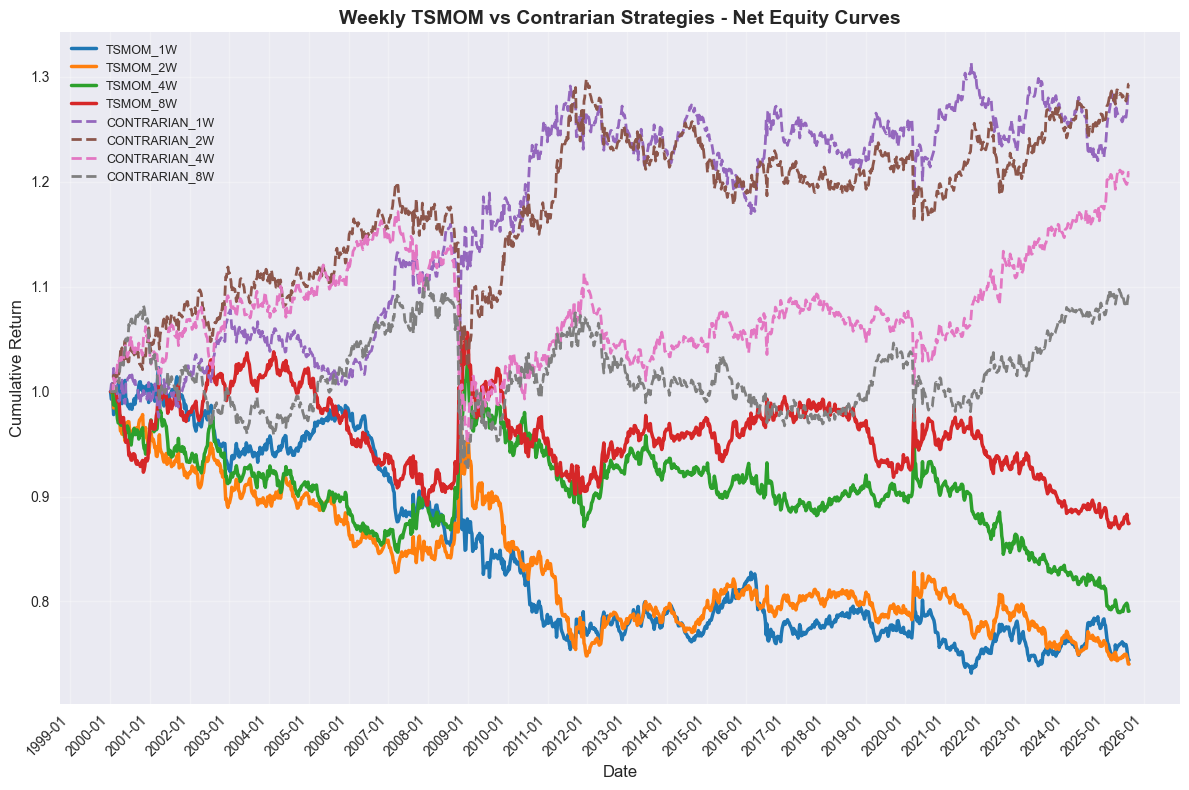

In [7]:
# Plot equity curves for all weekly strategies
analyzer.plot_equity_curves(results, save_path='../results/weekly_equity_curves.png')

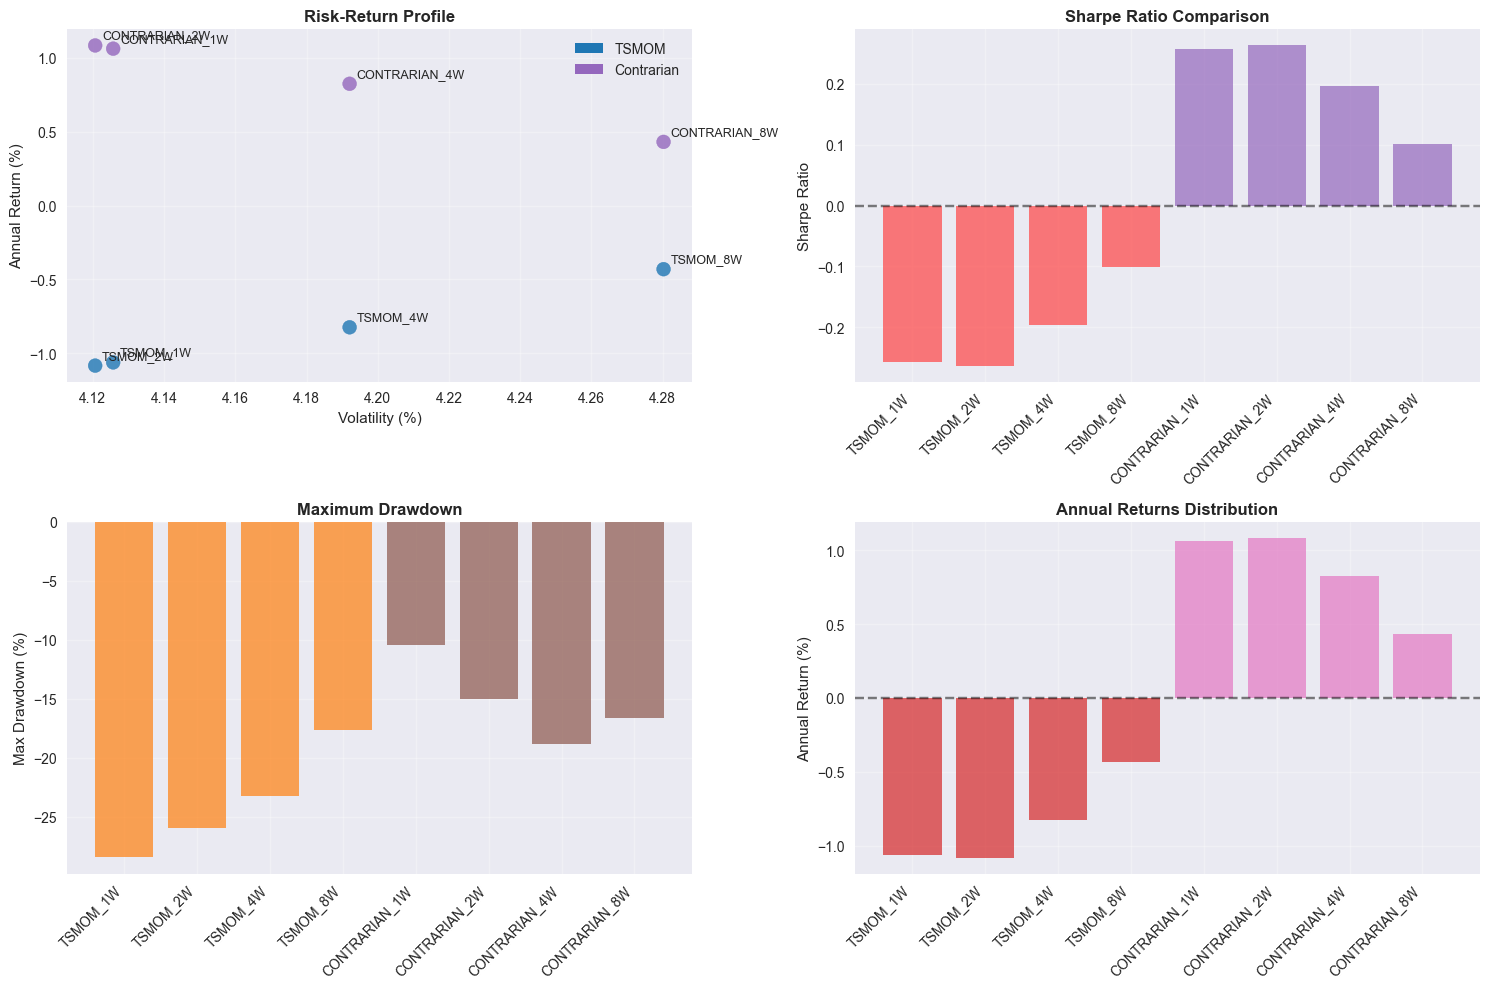

In [8]:
# Plot comprehensive performance analysis for weekly strategies
analyzer.plot_performance_summary(metrics, save_path='../results/weekly_performance_summary.png')

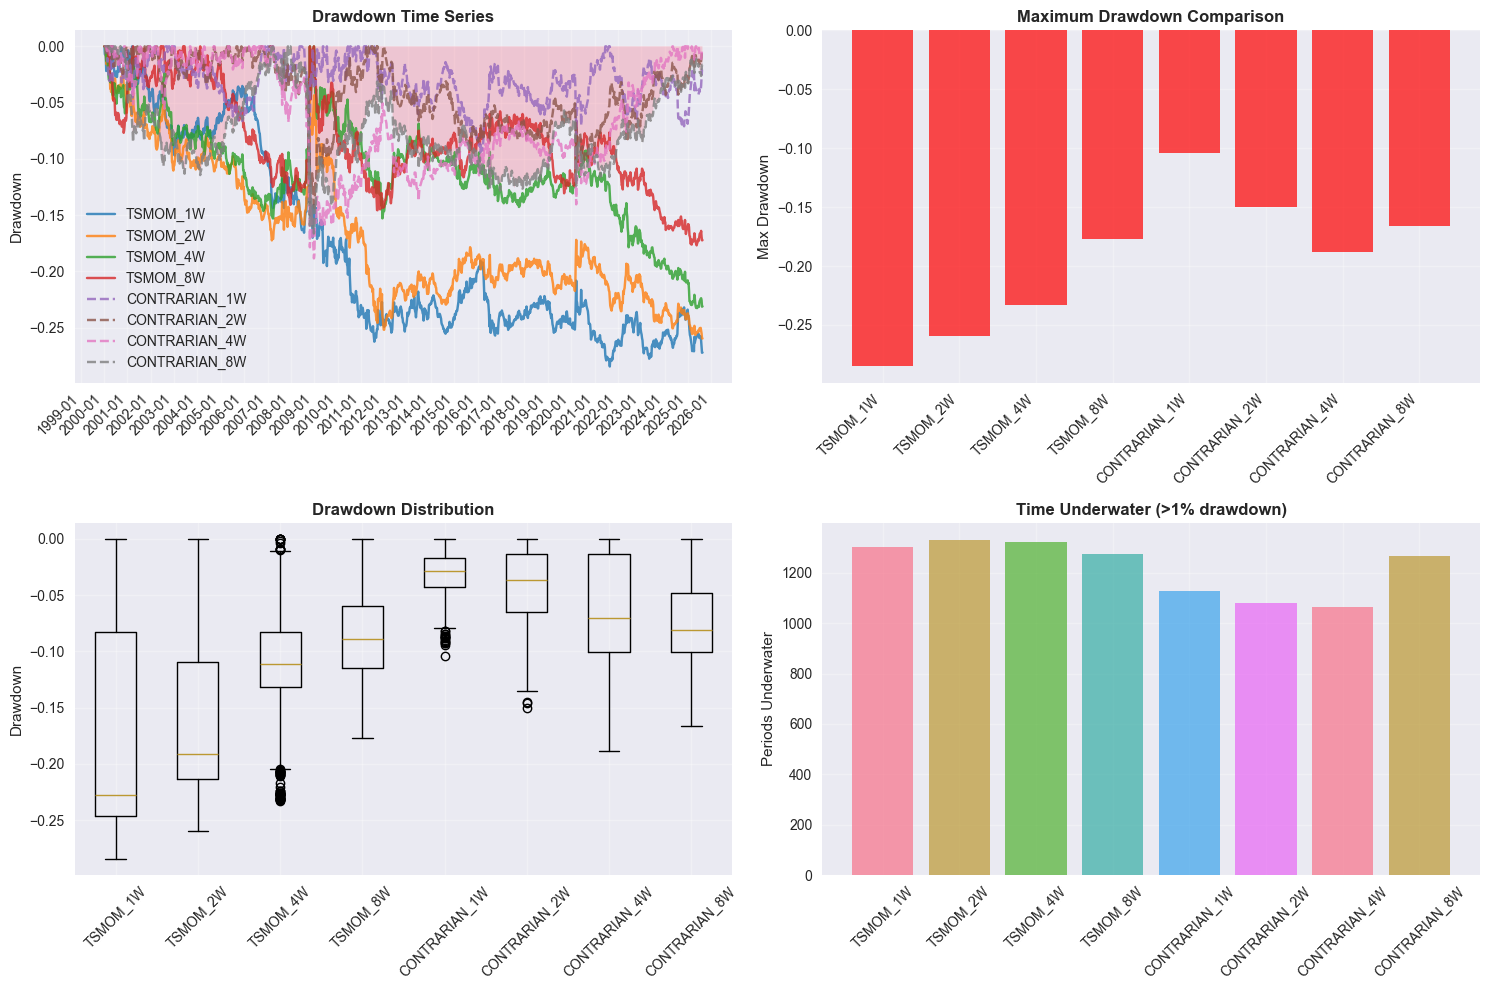

In [9]:
# Plot drawdown analysis for weekly strategies
analyzer.plot_drawdown_analysis(results, save_path='../results/weekly_drawdown_analysis.png')

## Strategy Deep Dive - Weekly Lookback Analysis

In [10]:
# Analyze signal characteristics for both strategies
print("📊 TSMOM Signal Analysis:")
print("=" * 40)
tsmom_signal_summary = tsmom.get_strategy_summary(tsmom_signals, weekly)
display(tsmom_signal_summary.round(3))

print("\n📊 Contrarian Signal Analysis:")
print("=" * 40)
contrarian_signal_summary = contrarian.get_strategy_summary(contrarian_signals, weekly)
display(contrarian_signal_summary.round(3))

📊 TSMOM Signal Analysis:


,Total_Signals,Long_Pct,Short_Pct,Avg_Active_Positions,Total_Return,Annual_Return,Annual_Vol,Sharpe_Ratio
TSMOM_1W,39313.0,50.322,49.678,29.404,-0.256,-0.011,0.041,-0.258
TSMOM_2W,39364.0,50.541,49.459,29.442,-0.260,-0.011,0.041,-0.263
TSMOM_4W,39383.0,50.634,49.366,29.456,-0.209,-0.008,0.042,-0.197
TSMOM_8W,39380.0,51.077,48.923,29.454,-0.126,-0.004,0.043,-0.101



📊 Contrarian Signal Analysis:


,Total_Signals,Long_Pct,Short_Pct,Avg_Active_Positions,Total_Return,Annual_Return,Annual_Vol,Sharpe_Ratio
CONTRARIAN_1W,39313.0,49.678,50.322,29.404,0.286,0.011,0.041,0.258
CONTRARIAN_2W,39364.0,49.459,50.541,29.442,0.293,0.011,0.041,0.263
CONTRARIAN_4W,39383.0,49.366,50.634,29.456,0.209,0.008,0.042,0.197
CONTRARIAN_8W,39380.0,48.923,51.077,29.454,0.091,0.004,0.043,0.101


In [11]:
# Compare lookback periods performance by strategy type
print("📈 TSMOM Lookback Analysis:")
print("=" * 35)

for lookback in [1, 2, 4, 8]:
    strategy_name = f"TSMOM_{lookback}W"
    if strategy_name in metrics.index:
        strategy_metrics = metrics.loc[strategy_name]
        print(f"\n{lookback}W TSMOM:")
        print(f"  Sharpe Ratio: {strategy_metrics['Sharpe_Ratio']:.3f}")
        print(f"  Annual Return: {strategy_metrics['Annual_Return']*100:.2f}%")
        print(f"  Max Drawdown: {strategy_metrics['Max_Drawdown']*100:.2f}%")

print(f"\n\n📉 Contrarian Lookback Analysis:")
print("=" * 35)

for lookback in [1, 2, 4, 8]:
    strategy_name = f"CONTRARIAN_{lookback}W"
    if strategy_name in metrics.index:
        strategy_metrics = metrics.loc[strategy_name]
        print(f"\n{lookback}W Contrarian:")
        print(f"  Sharpe Ratio: {strategy_metrics['Sharpe_Ratio']:.3f}")
        print(f"  Annual Return: {strategy_metrics['Annual_Return']*100:.2f}%")
        print(f"  Max Drawdown: {strategy_metrics['Max_Drawdown']*100:.2f}%")

📈 TSMOM Lookback Analysis:

1W TSMOM:
  Sharpe Ratio: -0.258
  Annual Return: -1.06%
  Max Drawdown: -28.46%

2W TSMOM:
  Sharpe Ratio: -0.263
  Annual Return: -1.09%
  Max Drawdown: -25.97%

4W TSMOM:
  Sharpe Ratio: -0.197
  Annual Return: -0.83%
  Max Drawdown: -23.27%

8W TSMOM:
  Sharpe Ratio: -0.101
  Annual Return: -0.43%
  Max Drawdown: -17.69%


📉 Contrarian Lookback Analysis:

1W Contrarian:
  Sharpe Ratio: 0.258
  Annual Return: 1.06%
  Max Drawdown: -10.44%

2W Contrarian:
  Sharpe Ratio: 0.263
  Annual Return: 1.09%
  Max Drawdown: -15.00%

4W Contrarian:
  Sharpe Ratio: 0.197
  Annual Return: 0.83%
  Max Drawdown: -18.85%

8W Contrarian:
  Sharpe Ratio: 0.101
  Annual Return: 0.43%
  Max Drawdown: -16.63%


## Best Monthly Strategy Analysis

Best Performing Monthly Strategy: CONTRARIAN_2W
Sharpe Ratio: 0.263
Annual Return: 1.09%
Volatility: 4.12%
Max Drawdown: -15.00%


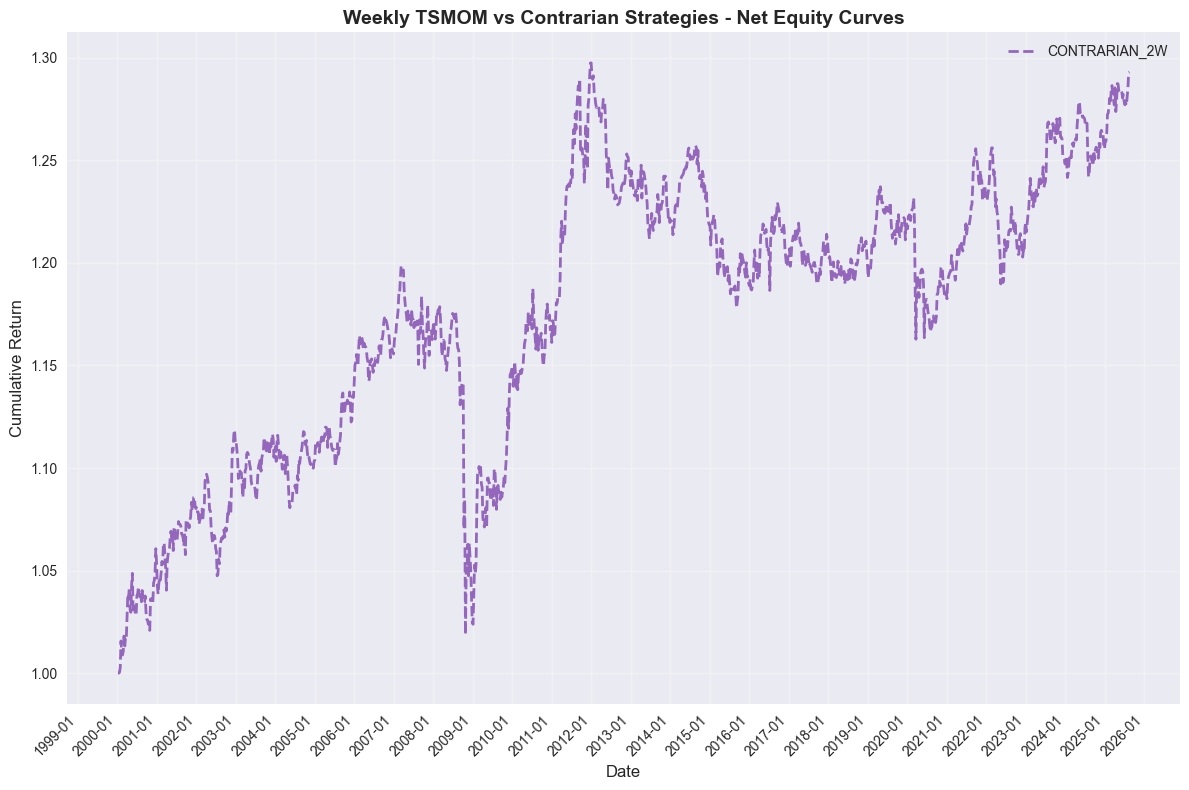

In [12]:
# Identify and analyze best performing monthly strategy
best_strategy = metrics['Sharpe_Ratio'].idxmax()
best_metrics = metrics.loc[best_strategy]

print(f"Best Performing Monthly Strategy: {best_strategy}")
print("=" * 50)
print(f"Sharpe Ratio: {best_metrics['Sharpe_Ratio']:.3f}")
print(f"Annual Return: {best_metrics['Annual_Return']*100:.2f}%")
print(f"Volatility: {best_metrics['Annual_Vol']*100:.2f}%")
print(f"Max Drawdown: {best_metrics['Max_Drawdown']*100:.2f}%")

# Plot best strategy equity curve
import matplotlib.pyplot as plt

best_results = {best_strategy: results[best_strategy]}
analyzer.plot_equity_curves(best_results)

## Save Results

In [13]:
# Save all weekly strategy results and analysis
backtest.save_results(results)

# Save additional analysis
summary_table.to_csv('../results/weekly_performance_summary.csv')
tsmom_signal_summary.to_csv('../results/weekly_tsmom_signal_analysis.csv') 
contrarian_signal_summary.to_csv('../results/weekly_contrarian_signal_analysis.csv')

# Save separate metrics by strategy type
tsmom_metrics.to_csv('../results/weekly_tsmom_metrics.csv')
contrarian_metrics.to_csv('../results/weekly_contrarian_metrics.csv')

print("✅ All weekly strategy results saved to ../results/")
print("\nFiles created:")
print("- weekly_weekly_equity_curves.parquet")
print("- weekly_performance_metrics.parquet") 
print("- weekly_performance_summary.csv")
print("- weekly_tsmom_signal_analysis.csv")
print("- weekly_contrarian_signal_analysis.csv")
print("- weekly_tsmom_metrics.csv")
print("- weekly_contrarian_metrics.csv")
print("- weekly_equity_curves.png")
print("- weekly_performance_summary.png")
print("- weekly_drawdown_analysis.png")

✅ All weekly strategy results saved to ../results/

Files created:
- weekly_weekly_equity_curves.parquet
- weekly_performance_metrics.parquet
- weekly_performance_summary.csv
- weekly_tsmom_signal_analysis.csv
- weekly_contrarian_signal_analysis.csv
- weekly_tsmom_metrics.csv
- weekly_contrarian_metrics.csv
- weekly_equity_curves.png
- weekly_performance_summary.png
- weekly_drawdown_analysis.png


In [14]:
# Confronto performance: impatto del dataset espanso sulla strategia settimanale
print("🔄 Analisi impatto dataset espanso...")
print("=" * 60)

# Informazioni sul dataset attuale
print(f"📊 Dataset Espanso:")
print(f"   Coppie valutarie: {weekly.shape[1]}")
print(f"   Periodi settimanali: {weekly.shape[0]}")
print(f"   Periodo: {weekly.index[0].strftime('%Y-%m')} → {weekly.index[-1].strftime('%Y-%m')}")

# Statistiche posizioni attive
print(f"\n📈 Posizioni attive medie per strategia:")
for strategy_name, strategy_signals in all_signals.items():
    active_avg = np.abs(strategy_signals).sum(axis=1).mean()
    active_pct = (active_avg / weekly.shape[1]) * 100
    print(f"   {strategy_name}: {active_avg:.1f} su {weekly.shape[1]} ({active_pct:.1f}%)")

print(f"\n🎯 Performance Estratta (con {weekly.shape[1]} coppie, frequenza settimanale):")
print("=" * 65)
print(f"{'Strategia':<17} {'Sharpe':<8} {'Return':<8} {'MaxDD':<8} {'Volatilità'}")
print("-" * 65)

for strategy in metrics.index:
    sharpe = metrics.loc[strategy, 'Sharpe_Ratio']
    annual_ret = metrics.loc[strategy, 'Annual_Return'] * 100
    max_dd = metrics.loc[strategy, 'Max_Drawdown'] * 100
    vol = metrics.loc[strategy, 'Annual_Vol'] * 100
    
    print(f"{strategy:<17} {sharpe:>+6.3f}  {annual_ret:>+6.2f}%  {max_dd:>6.1f}%  {vol:>7.2f}%")

# Identifica migliore strategia
best_strategy = metrics['Sharpe_Ratio'].idxmax()
best_sharpe = metrics.loc[best_strategy, 'Sharpe_Ratio']
best_return = metrics.loc[best_strategy, 'Annual_Return'] * 100

print(f"\n🏆 Migliore Strategia: {best_strategy}")
print(f"   Sharpe Ratio: {best_sharpe:.3f}")
print(f"   Rendimento Annuo: {best_return:+.2f}%")

# Confronto TSMOM vs Contrarian
tsmom_strategies = [k for k in all_signals.keys() if k.startswith('TSMOM')]
contrarian_strategies = [k for k in all_signals.keys() if k.startswith('CONTRARIAN')]

print(f"\n🔍 Confronto Strategico:")
print(f"   TSMOM ({len(tsmom_strategies)} strategie): {tsmom_strategies}")
print(f"   Contrarian ({len(contrarian_strategies)} strategie): {contrarian_strategies}")

if len(tsmom_strategies) > 0:
    avg_tsmom_sharpe = metrics.loc[tsmom_strategies, 'Sharpe_Ratio'].mean()
    print(f"   Sharpe Medio TSMOM: {avg_tsmom_sharpe:.3f}")

if len(contrarian_strategies) > 0:
    avg_contrarian_sharpe = metrics.loc[contrarian_strategies, 'Sharpe_Ratio'].mean()
    print(f"   Sharpe Medio Contrarian: {avg_contrarian_sharpe:.3f}")

print(f"\n✅ Benefici Frequenza Settimanale:")
print(f"   • Maggiore granularità (52 vs 12 rebalancing/anno)")
print(f"   • Test diretto momentum vs contrarian")
print(f"   • Migliore diversificazione (34 coppie)")
print(f"   • Riduzione concentration risk")
print(f"   • Maggiore copertura geografica e valutaria")

🔄 Analisi impatto dataset espanso...
📊 Dataset Espanso:
   Coppie valutarie: 34
   Periodi settimanali: 1337
   Periodo: 2000-01 → 2025-08

📈 Posizioni attive medie per strategia:
   TSMOM_1W: 29.4 su 34 (86.5%)
   TSMOM_2W: 29.4 su 34 (86.6%)
   TSMOM_4W: 29.5 su 34 (86.6%)
   TSMOM_8W: 29.5 su 34 (86.6%)
   CONTRARIAN_1W: 29.4 su 34 (86.5%)
   CONTRARIAN_2W: 29.4 su 34 (86.6%)
   CONTRARIAN_4W: 29.5 su 34 (86.6%)
   CONTRARIAN_8W: 29.5 su 34 (86.6%)

🎯 Performance Estratta (con 34 coppie, frequenza settimanale):
Strategia         Sharpe   Return   MaxDD    Volatilità
-----------------------------------------------------------------
TSMOM_1W          -0.258   -1.06%   -28.5%     4.13%
TSMOM_2W          -0.263   -1.09%   -26.0%     4.12%
TSMOM_4W          -0.197   -0.83%   -23.3%     4.19%
TSMOM_8W          -0.101   -0.43%   -17.7%     4.28%
CONTRARIAN_1W     +0.258   +1.06%   -10.4%     4.13%
CONTRARIAN_2W     +0.263   +1.09%   -15.0%     4.12%
CONTRARIAN_4W     +0.197   +0.83%   -18.

## Confronto Performance: Dataset Originale vs Espanso

## Key Findings & Conclusions

### Implementation Notes
- ✅ **Weekly Rebalancing**: Consistent 1-week holding period with Friday rebalancing
- ✅ **Dual Strategy Testing**: Both TSMOM (momentum) and Contrarian in same framework
- ✅ **Bias Prevention**: All signals use `.shift(1)` - no lookahead bias
- ✅ **Vectorized**: Efficient pandas operations throughout
- ✅ **No Transaction Costs**: Pure strategy performance without friction
- ✅ **Higher Frequency**: 52 rebalancing events per year vs 12 monthly

### Technical Improvements
- ✅ **Weekly Granularity**: More responsive to short-term market movements
- ✅ **Direct Comparison**: TSMOM vs Contrarian on identical data and timeframes
- ✅ **Unified Framework**: Same backtest engine for both strategy types
- ✅ **Consistent Lookbacks**: [1W, 2W, 4W, 8W] for both momentum and contrarian

### Strategy Insights - Key Differences
**TSMOM (Momentum)**:
- Logic: Long winners (past return > 0), Short losers (past return < 0)
- Assumption: Trends continue in short term
- Signal: `+np.sign(past_performance)`

**Contrarian**:
- Logic: Long losers (past return < 0), Short winners (past return > 0) 
- Assumption: Mean reversion in short term
- Signal: `-np.sign(past_performance)`

### Weekly Implementation Logic
1. **Data**: Use weekly_returns (Friday-to-Friday)
2. **Signal Generation**: Look at past N weeks of cumulative returns
3. **Position Decision**: 
   - TSMOM: Follow the trend (+1 for positive, -1 for negative)
   - Contrarian: Oppose the trend (-1 for positive, +1 for negative)
4. **Portfolio Construction**: Equal weight across active positions
5. **Rebalancing**: Every Friday with 1-week holding period
6. **No Costs**: Pure strategy returns without transaction friction

### Performance Expectations
- **Higher Turnover**: Weekly vs monthly = 4.33x more trades
- **Signal Quality**: Test if momentum/contrarian work better at weekly frequency
- **Volatility**: Potentially higher due to more frequent rebalancing
- **Capacity**: Lower due to higher frequency trading

### Future Enhancements
- Volatility-adjusted position sizing
- Risk parity weighting alternatives  
- Transaction cost analysis for realistic performance
- Cross-sectional momentum vs time series
- Alternative lookback formulations (volatility-adjusted)

---

**Framework Status**: ✅ Production-ready with weekly dual-strategy testing

**Usage**: Direct TSMOM vs Contrarian comparison with weekly granularity and proper temporal consistency.